/tmp/ipykernel_53/2986793348.py:6: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


                                     count      mean       std  min  25%  50%  \
CONNECTION_social_days_friends_p7d                                              
0.0                                  876.0  5.117580  2.366647  1.0  3.0  5.0   
1.0                                  978.0  5.890593  2.362556  1.0  4.0  6.0   
2.0                                 1090.0  6.289908  2.188204  1.0  5.0  6.5   
3.0                                  910.0  6.385714  2.147891  1.0  5.0  7.0   
4.0                                  527.0  6.626186  2.093516  1.0  5.0  7.0   
5.0                                  519.0  6.978805  1.898367  1.0  6.0  7.0   
6.0                                  185.0  7.032432  1.961318  1.0  6.0  7.0   
7.0                                  679.0  6.761414  2.049300  1.0  6.0  7.0   

                                    75%   max  
CONNECTION_social_days_friends_p7d             
0.0                                 7.0  10.0  
1.0                                 8.0  10.0

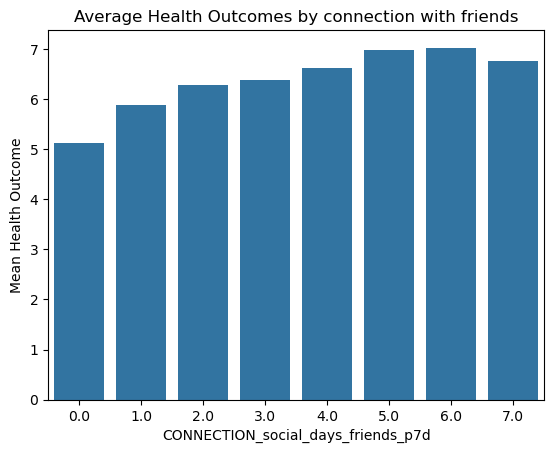

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(url)

# variables about connection, can be used as predictor variable xi
# variables about wellness, such as WELLNESS_life_satisfaction, can be used as outcome Yi
connection_data = df[['CONNECTION_social_days_family_p7d', 'CONNECTION_social_days_friends_p7d', 'CONNECTION_social_num_close_friends',
                      'CONNECTION_preference_time_family', 'CONNECTION_social_num_friends_p7d', 'DEMO_relationship_status',
                      'WELLNESS_gad_score', 'WELLNESS_life_satisfaction']]

# statistics about outcome and predictor variable
connection_stats = connection_data.groupby('CONNECTION_social_days_friends_p7d')['WELLNESS_life_satisfaction'].describe()
print(connection_stats)

connection_means = connection_data.groupby('CONNECTION_social_days_friends_p7d')['WELLNESS_life_satisfaction'].mean().reset_index()

# bar plot
sns.barplot(x='CONNECTION_social_days_friends_p7d', y='WELLNESS_life_satisfaction', data = connection_means)
plt.title('Average Health Outcomes by connection with friends')
plt.ylabel('Mean Health Outcome')
plt.show()

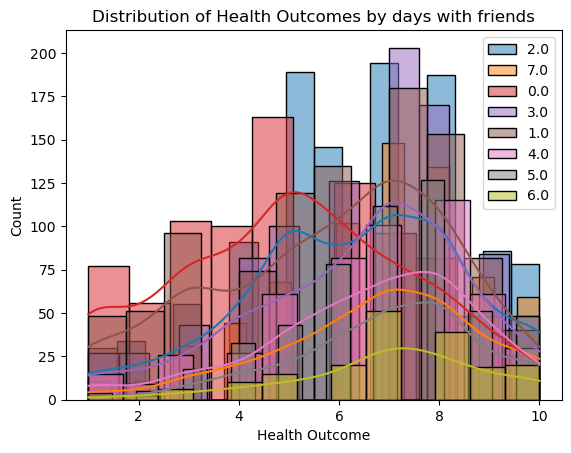

In [6]:
# histogram
for days_with_friends in connection_data['CONNECTION_social_days_friends_p7d'].unique():
    subset = connection_data[connection_data['CONNECTION_social_days_friends_p7d'] == days_with_friends]
    sns.histplot(subset['WELLNESS_life_satisfaction'], label=days_with_friends, kde=True, alpha=0.5)

plt.legend()
plt.title('Distribution of Health Outcomes by days with friends')
plt.xlabel('Health Outcome')
plt.show()

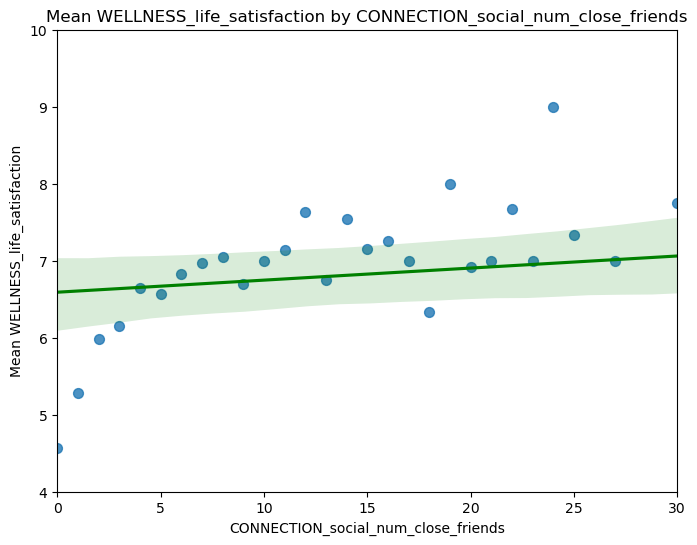

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

# Assuming `data` is your DataFrame
# Aggregate to get the mean WELLNESS_life_satisfaction for each CONNECTION_social_num_close_friends value
aggregated_data = data.groupby('CONNECTION_social_num_close_friends', as_index=False).WELLNESS_life_satisfaction.mean()

# Plot the aggregated data
plt.figure(figsize=(8, 6))
sns.regplot(x='CONNECTION_social_num_close_friends', y='WELLNESS_life_satisfaction', data=aggregated_data,
            line_kws={"color": "green"}, scatter_kws={"s": 50})
plt.xlim(0, 30)
plt.ylim(4,10)
plt.title('Mean WELLNESS_life_satisfaction by CONNECTION_social_num_close_friends')
plt.xlabel('CONNECTION_social_num_close_friends')
plt.ylabel('Mean WELLNESS_life_satisfaction')
plt.show()

                                OLS Regression Results                                
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.132
Model:                                    OLS   Adj. R-squared:                  0.107
Method:                         Least Squares   F-statistic:                     5.181
Date:                        Mon, 28 Oct 2024   Prob (F-statistic):             0.0292
Time:                                20:54:25   Log-Likelihood:                -59.443
No. Observations:                          36   AIC:                             122.9
Df Residuals:                              34   BIC:                             126.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

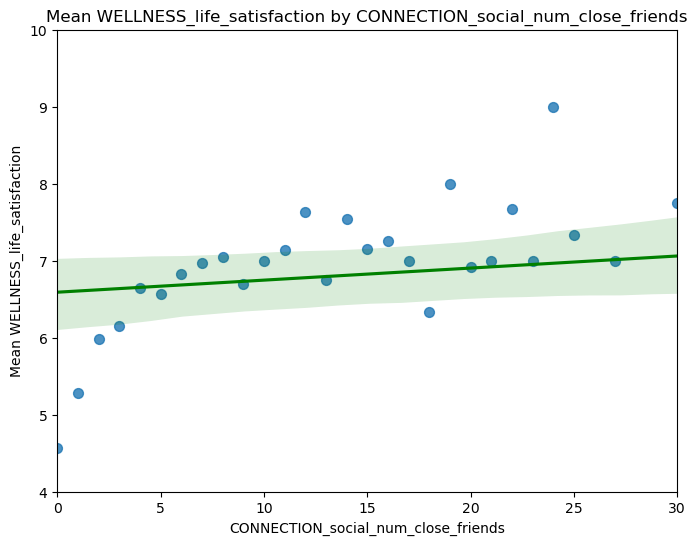

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming `data` is your DataFrame
# Aggregate to get the mean WELLNESS_life_satisfaction for each CONNECTION_social_num_close_friends value
aggregated_data = data.groupby('CONNECTION_social_num_close_friends', as_index=False).WELLNESS_life_satisfaction.mean()

# Fit the model
model = smf.ols(formula='WELLNESS_life_satisfaction ~ CONNECTION_social_num_close_friends', data=aggregated_data).fit()
print(model.summary())

# Plot the aggregated data with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='CONNECTION_social_num_close_friends', y='WELLNESS_life_satisfaction', data=aggregated_data,
            line_kws={"color": "green"}, scatter_kws={"s": 50})
plt.xlim(0, 30)
plt.ylim(4, 10)
plt.title('Mean WELLNESS_life_satisfaction by CONNECTION_social_num_close_friends')
plt.xlabel('CONNECTION_social_num_close_friends')
plt.ylabel('Mean WELLNESS_life_satisfaction')
plt.show()

                            count      mean       std  min  25%  50%  75%  \
DEMO_relationship_status                                                    
In a relationship          4142.0  6.612506  2.194430  1.0  5.0  7.0  8.0   
Presented but no response    51.0  6.411765  2.750829  1.0  5.0  7.0  8.0   
Single and dating           785.0  5.729936  2.222550  1.0  4.0  6.0  7.0   
Single and not dating      3370.0  5.712463  2.433465  1.0  4.0  6.0  8.0   

                            max  
DEMO_relationship_status         
In a relationship          10.0  
Presented but no response  10.0  
Single and dating          10.0  
Single and not dating      10.0  


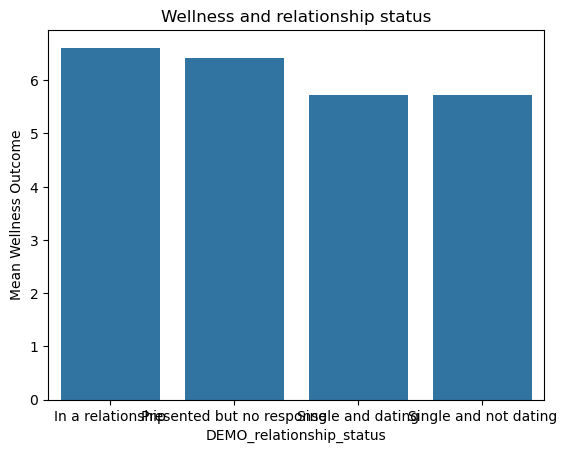

In [12]:
wellness_with_relationship_status = connection_data.groupby('DEMO_relationship_status')['WELLNESS_life_satisfaction'].describe()
print(wellness_with_relationship_status)
wellness_with_relationship_status_means = connection_data.groupby('DEMO_relationship_status')['WELLNESS_life_satisfaction'].mean().reset_index()
sns.barplot(x='DEMO_relationship_status', y='WELLNESS_life_satisfaction', data = wellness_with_relationship_status_means)
plt.title('Wellness and relationship status')
plt.ylabel('Mean Wellness Outcome')
plt.show()